In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
def project(vector, matrix):
    return vector @ matrix

def resize(arr):
    shape = arr.shape
    size = arr.size
    
    if len(shape) < 2:
        return np.resize(arr, (1, shape[0])) 
    
    else:
        return arr

In [14]:
def greedy(vectors, error):
    list_approx_base = None
    
    approx_error = 1e10
    while approx_error > error and vectors.shape[0] > 0:
        best_vec = vectors[0]
        best_idx = 0        
        
        for idx, projector in enumerate(vectors):
            if list_approx_base is None:
                temp_new_base = np.copy(projector)
            else:
                temp_new_base = np.vstack((list_approx_base, projector))
            
            to_normalize = vectors @ temp_new_base.T
            normalized = np.zeros_like(to_normalize)
            
            if len(to_normalize.shape) < 2:
                normalized = to_normalize / npl.norm(to_normalize)**2
                
            else:
                for idx_comp in range(to_normalize.shape[1]):
                    norm = npl.norm(temp_new_base[idx_comp])
                    normalized[:, idx_comp] = to_normalize[:, idx_comp] / (norm ** 2)

            temp_error = npl.norm(np.outer(to_normalize, 
                                           temp_new_base))
    
            if temp_error < approx_error:
                approx_error = temp_error
                best_idx = idx
                best_vec = np.copy(projector)
        
        if list_approx_base is None:
            list_approx_base = best_vec
        else:
            list_approx_base = np.vstack((list_approx_base, best_vec))
        
        vectors = np.delete(vectors, best_idx, axis=0)
    
    return list_approx_base

In [22]:
vectors = np.random.random((10,)) * 2 - 1

greedy(vectors, 1).shape

(100, 20)

[[1 1]]
[[-0.50266256  0.34164379]
 [-0.04696832  0.8942157 ]
 [-0.94238343  0.31363721]
 [ 0.10060747 -0.99413748]
 [ 0.51990523 -0.28297628]
 [ 0.95699247 -0.50396382]
 [ 0.64386506 -0.69699477]
 [-0.17526002 -0.48392782]
 [ 0.58734484  0.44962483]
 [-0.52109453 -0.13223626]]
[[-0.16101877  0.84724738 -0.62874623 -0.89353001  0.23692894  0.45302865
  -0.05312971 -0.65918784  1.03696968 -0.6533308 ]]
[[-0.50266256  0.34164379]
 [-0.04696832  0.8942157 ]
 [-0.94238343  0.31363721]
 [ 0.10060747 -0.99413748]
 [ 0.51990523 -0.28297628]
 [ 0.95699247 -0.50396382]
 [ 0.64386506 -0.69699477]
 [-0.17526002 -0.48392782]
 [ 0.58734484  0.44962483]
 [-0.52109453 -0.13223626]]
(1, 10)
[[-0.16101877  0.84724738 -0.62874623 -0.89353001  0.23692894  0.45302865
  -0.05312971 -0.65918784  1.03696968 -0.6533308 ]]


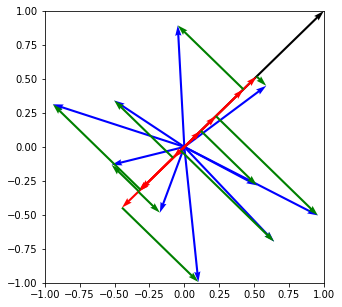

In [5]:
base = np.array([[1,1]])

vectors = np.random.random((10,2)) * 2 - 1
print(base)
print(vectors)

print(base @ vectors.T)

kwargs = {'angles':'xy', 'scale_units':'xy', 'scale':1}

origin = [0], [0] # origin point

vec = vectors
print(vec)

plt.figure(figsize=(5,5))
## BASE
plt.quiver(*origin, base[:, 0], base[:, 1], **kwargs)
## VECTORS
plt.quiver(*origin, vec[:,0], vec[:,1], color=['b'], **kwargs)
## PROJ
temp = base @ vec.T
print(temp.shape)
print(temp)

proj = np.outer(base @ vec.T / npl.norm(base)**2, base)
# print(proj)
plt.quiver(*origin, proj[:,0], proj[:,1], color=['r'], **kwargs)
antiproj = vec- proj
# print(antiproj)
plt.quiver(proj[:,0], proj[:,1], antiproj[:,0], antiproj[:,1], color=['g'], **kwargs)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()